In [ ]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklego.linear_model import LADRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           roc_curve, roc_auc_score, f1_score)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report


Note: you may need to restart the kernel to use updated packages.


In [2]:

# Fetch dataset
covertype = fetch_ucirepo(id=31)

# Get the features DataFrame
X = covertype.data.features

# Print all column names
print("All columns in the dataset:")
for column in X.columns:
    print(column)

# Print the total number of columns
print(f"\nTotal number of columns: {len(X.columns)}")

All columns in the dataset:
Elevation
Aspect
Slope
Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Hillshade_9am
Hillshade_Noon
Hillshade_3pm
Horizontal_Distance_To_Fire_Points
Wilderness_Area1
Soil_Type1
Soil_Type2
Soil_Type3
Soil_Type4
Soil_Type5
Soil_Type6
Soil_Type7
Soil_Type8
Soil_Type9
Soil_Type10
Soil_Type11
Soil_Type12
Soil_Type13
Soil_Type14
Soil_Type15
Soil_Type16
Soil_Type17
Soil_Type18
Soil_Type19
Soil_Type20
Soil_Type21
Soil_Type22
Soil_Type23
Soil_Type24
Soil_Type25
Soil_Type26
Soil_Type27
Soil_Type28
Soil_Type29
Soil_Type30
Soil_Type31
Soil_Type32
Soil_Type33
Soil_Type34
Soil_Type35
Soil_Type36
Soil_Type37
Soil_Type38
Soil_Type39
Soil_Type40
Wilderness_Area2
Wilderness_Area3
Wilderness_Area4

Total number of columns: 54


In [3]:
# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

# Convert X and y into a single DataFrame
# Assuming that X and y are already in compatible formats
df = pd.DataFrame(X)
df['Target'] = y

# Display the first few rows of the DataFrame
print(df.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

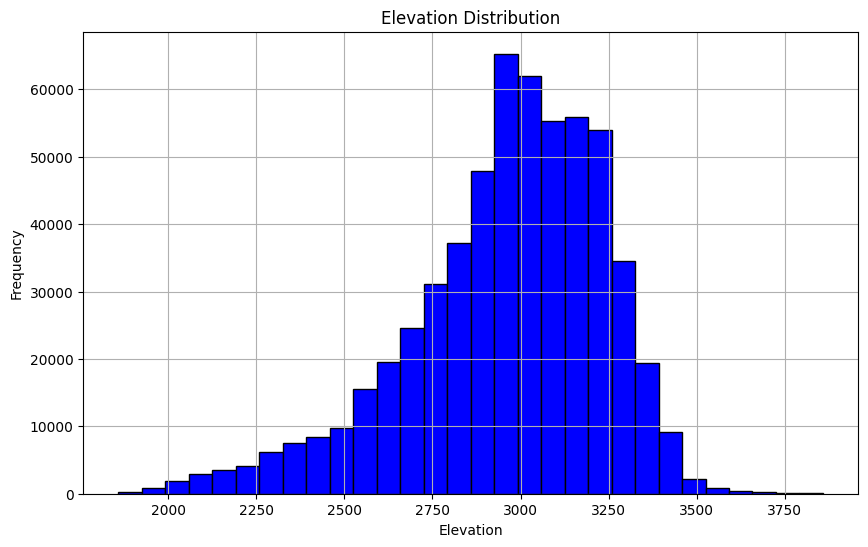

In [4]:
import matplotlib.pyplot as plt

# Plot a histogram of the Elevation column
plt.figure(figsize=(10, 6))
plt.hist(df['Elevation'], bins=30, color='blue', edgecolor='black')
plt.title('Elevation Distribution')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [5]:
## Chack that there is no missingness ## 
# Calculate the percentage of missing values for each column
missingness = df.isnull().mean() * 100

# Display columns with missingness
print(f"Missingness for each feature:")
print(missingness[missingness > 0])

Missingness for each feature:
Series([], dtype: float64)


In [6]:
# Taking a stratified sample in order to visualize distrubutions more clearly
strat_samp = df.groupby('Target').sample(1000)
print(strat_samp)

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
424988       3325     261     14                               127   
536985       3304     332     16                               808   
454196       3090     155     14                                42   
315650       3086      58     26                               531   
555768       3337     171      9                               708   
...           ...     ...    ...                               ...   
488072       3370     124     20                               365   
376813       3445     165     18                               959   
14449        3391     353     17                               467   
290821       3325     343     15                                30   
327220       3338      94      9                               350   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
424988                              21                             1831   
536985   

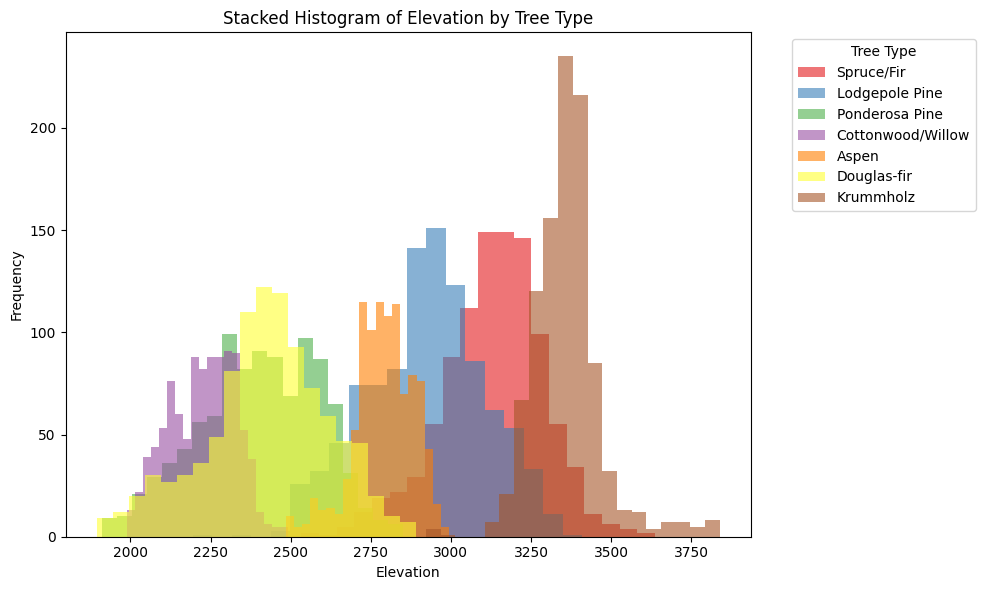

In [7]:
# Visualize how the elevation is split between each tree type 
# Set up plot
plt.figure(figsize=(10, 6))
bins = 20
colors = sns.color_palette("Set1", 7)

# Rename variables
tree_names = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"    
}

# Plot each histogram
for i in range(1, 8):
    subset = strat_samp[strat_samp['Target'] == i]
    plt.hist(subset['Elevation'], bins=bins, alpha=0.6, label=tree_names[i], color=colors[i-1], stacked=True)

# Add labels/title and plot
plt.title("Stacked Histogram of Elevation by Tree Type")
plt.xlabel("Elevation")
plt.ylabel("Frequency")
plt.legend(title='Tree Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


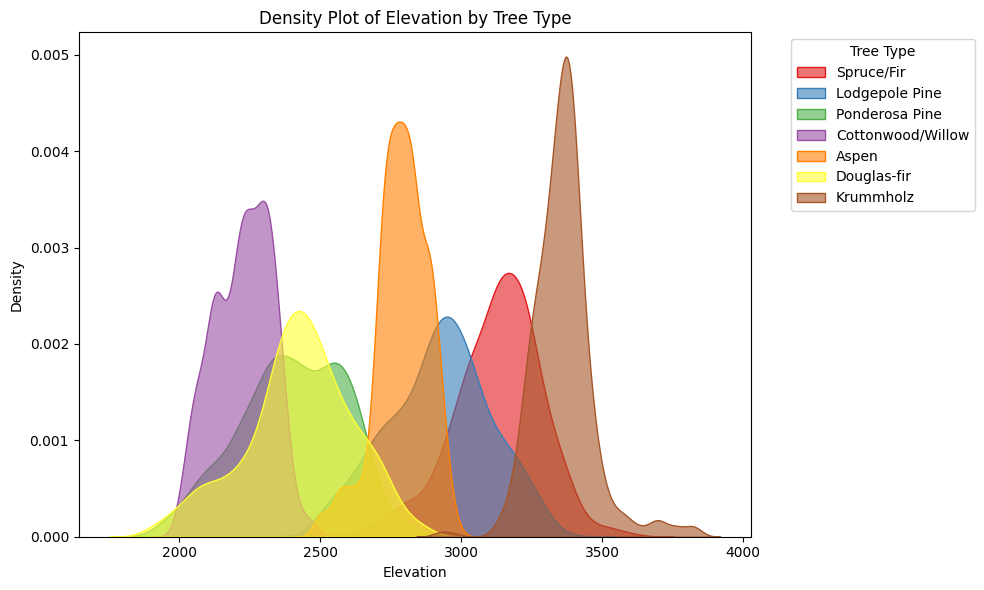

In [8]:
# Can change to a density curve for clearer visualization
# Set up plot
plt.figure(figsize=(10, 6))
bins = 20  # You can adjust this, but KDE plots don't require bins like histograms
colors = sns.color_palette("Set1", 7)

# Rename variables
tree_names = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"    
}

# Plot each density curve
for i in range(1, 8):
    subset = strat_samp[strat_samp['Target'] == i]
    sns.kdeplot(subset['Elevation'], fill=True, color=colors[i-1], label=tree_names[i], alpha=0.6)

# Add labels/title and plot
plt.title("Density Plot of Elevation by Tree Type")
plt.xlabel("Elevation")
plt.ylabel("Density")
plt.legend(title='Tree Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We can see that Spruce/Fir and Lodgepole Pines occur at elevations primarily between 2500-3500, Ponderosa Pines and Douglass-fir occur at lower elevations (between 2000-2750)

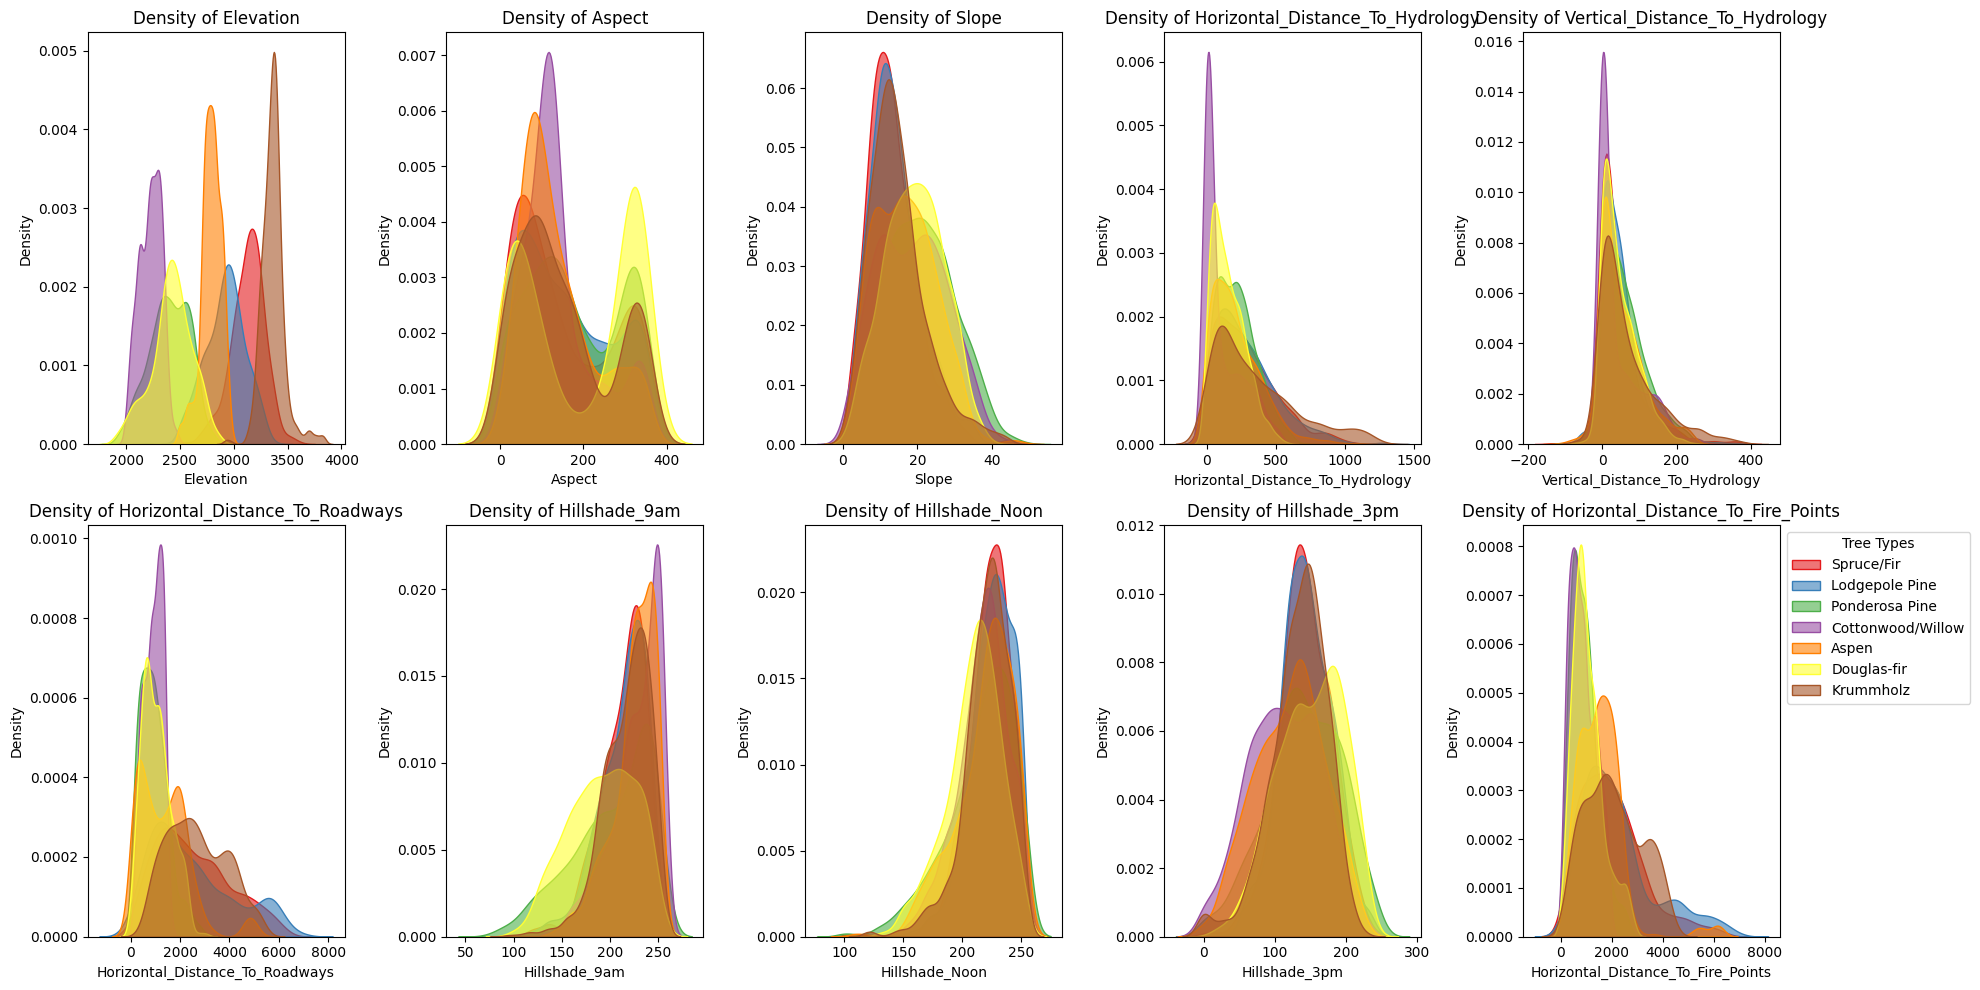

In [9]:
# Rename variables
tree_names = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"    
}

# Define the variables
variables = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
             'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

# Set up the subplot grid (2 columns and 5 rows)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10)) 
axes = axes.flatten()
colors = sns.color_palette("Set1", 7)

# Plot KDEs for each variable
for i, variable in enumerate(variables):
    ax = axes[i]  

    for tree_type in range(1, 8):
        # Filter the data for the specific tree type
        subset = strat_samp[strat_samp['Target'] == tree_type]

        # Plot the KDE for the current tree type's values of the variable
        sns.kdeplot(subset[variable], ax=ax, fill=True, color=colors[tree_type-1], label=tree_names[tree_type], alpha=0.6)

    # Customize the plot for this variable
    ax.set_title(f"Density of {variable}")
    ax.set_xlabel(variable)
    ax.set_ylabel("Density")

# Adjust layout for better spacing
plt.tight_layout()
ax.legend(title='Tree Types', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

Visualizing the different variables it appears that Elevation, Horizontal Distance to Roadways and Fire Points may be the easiest to use for a predictor model because they appear to be the most spread out of all the variables

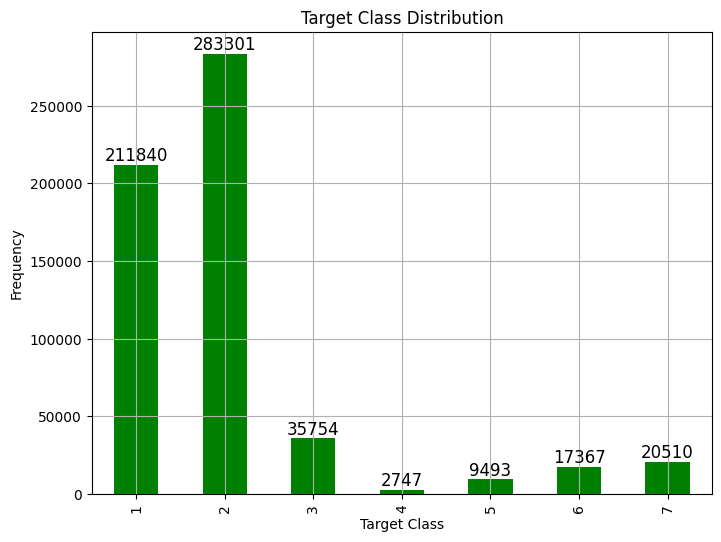

In [10]:
# Visualize the Target Class Distribution
plt.figure(figsize=(8, 6))
ax = df['Target'].value_counts().sort_index().plot(kind='bar', color='green')

# Add the number of trees in each category as text on top of the bars
for i, count in enumerate(df['Target'].value_counts().sort_index()):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Target Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

There are significantly more recorded instances of Spruce/Fir and Lodgepole Pines as opposed to the other tree types

In [11]:
# Filter columns that are related to Soil Type
soil_columns = [col for col in df.columns if 'Soil_Type' in col]

# Display the Soil Type columns
print("Soil Types Columns:")
print(soil_columns)

# Now, let's print the first few rows of the Soil Type data
soil_data = df[soil_columns]
print("\nFirst 5 rows of Soil Type Data:")
print(soil_data)

Soil Types Columns:
['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

First 5 rows of Soil Type Data:
        Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  \
0                0           0           0           0           0   
1                0           0           0           0           0   
2                0           0           0           0           0   
3                0           0           0           0           0   
4    

In [12]:
# Filter columns that are related to Soil Type
soil_columns = [col for col in X.columns if 'Soil_Type' in col]

# Count the number of 1s for each soil type
soil_counts = X[soil_columns].sum().sort_values(ascending=False)

# Create a DataFrame with the counts
soil_counts_df = pd.DataFrame({'Soil Type': soil_counts.index, 'Count': soil_counts.values})

# Display the counts
print(soil_counts_df)

# Check for any soil types with zero occurrences
zero_soil_types = soil_counts[soil_counts == 0]
if not zero_soil_types.empty:
    print("\nSoil types with zero occurrences:")
    print(zero_soil_types)
else:
    print("\nAll soil types have at least one occurrence.")

      Soil Type   Count
0   Soil_Type29  115247
1   Soil_Type23   57752
2   Soil_Type32   52519
3   Soil_Type33   45154
4   Soil_Type22   33373
5   Soil_Type10   32634
6   Soil_Type30   30170
7   Soil_Type12   29971
8   Soil_Type31   25666
9   Soil_Type24   21278
10  Soil_Type13   17431
11  Soil_Type38   15573
12  Soil_Type39   13806
13  Soil_Type11   12410
14   Soil_Type4   12396
15  Soil_Type20    9259
16  Soil_Type40    8750
17   Soil_Type2    7525
18   Soil_Type6    6575
19   Soil_Type3    4823
20  Soil_Type19    4021
21  Soil_Type17    3422
22   Soil_Type1    3031
23  Soil_Type16    2845
24  Soil_Type26    2589
25  Soil_Type18    1899
26  Soil_Type35    1891
27  Soil_Type34    1611
28   Soil_Type5    1597
29   Soil_Type9    1147
30  Soil_Type27    1086
31  Soil_Type28     946
32  Soil_Type21     838
33  Soil_Type14     599
34  Soil_Type25     474
35  Soil_Type37     298
36   Soil_Type8     179
37  Soil_Type36     119
38   Soil_Type7     105
39  Soil_Type15       3

All soil types 

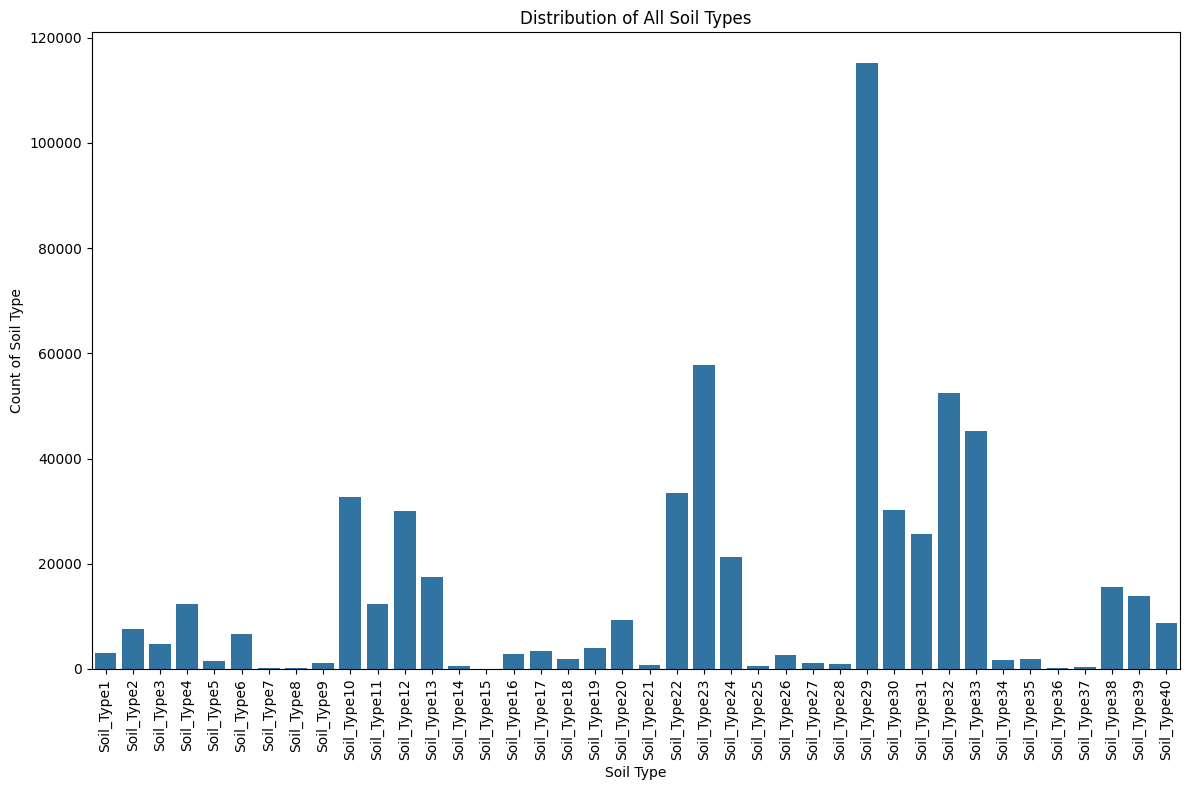

In [13]:
import seaborn as sns
# Filter columns that are related to Soil Type
soil_columns = [col for col in df.columns if 'Soil_Type' in col]

# Summing up the occurrences of each soil type across all rows
soil_counts = df[soil_columns].sum()

# Plotting the bar graph for all soil types
plt.figure(figsize=(12,8))
sns.barplot(x=soil_counts.index, y=soil_counts.values)
plt.title("Distribution of All Soil Types")
plt.xlabel("Soil Type")
plt.ylabel("Count of Soil Type")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


Soil types where there are no observations in the data (7, 8, 14, 15, 21, 25, 26, 27, 28, 34, 35, 36, 37, etc.) we will data clean to exclude. We will use L1 and L2 regression, and determine which gives the line of best fit, in order to analyze our data.





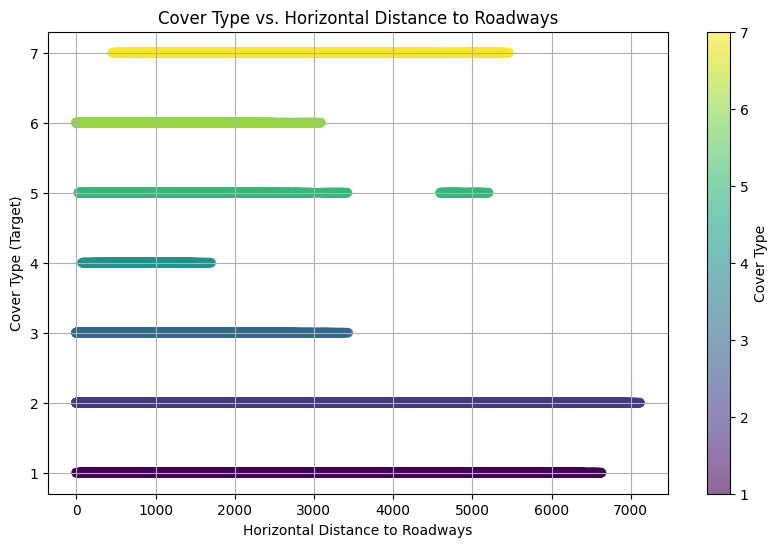

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Horizontal_Distance_To_Roadways'], df['Target'], alpha=0.6, c=df['Target'], cmap='viridis')
plt.title('Cover Type vs. Horizontal Distance to Roadways')
plt.xlabel('Horizontal Distance to Roadways')
plt.ylabel('Cover Type (Target)')
plt.colorbar(label='Cover Type')
plt.grid(True)
plt.show()

In [15]:
%pip install scikit-lego
%pip install sklego

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [16]:
# First, split the data into training and temp (which will later be split into validation and testing)
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42) # the random state will ensure we will all start at the same point

# Now split the temp data into validation and testing sets
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Check the sizes of each set
print(f'Training set size: {train_data.shape[0]}')
print(f'Validation set size: {val_data.shape[0]}')
print(f'Test set size: {test_data.shape[0]}')

Training set size: 348607
Validation set size: 116202
Test set size: 116203


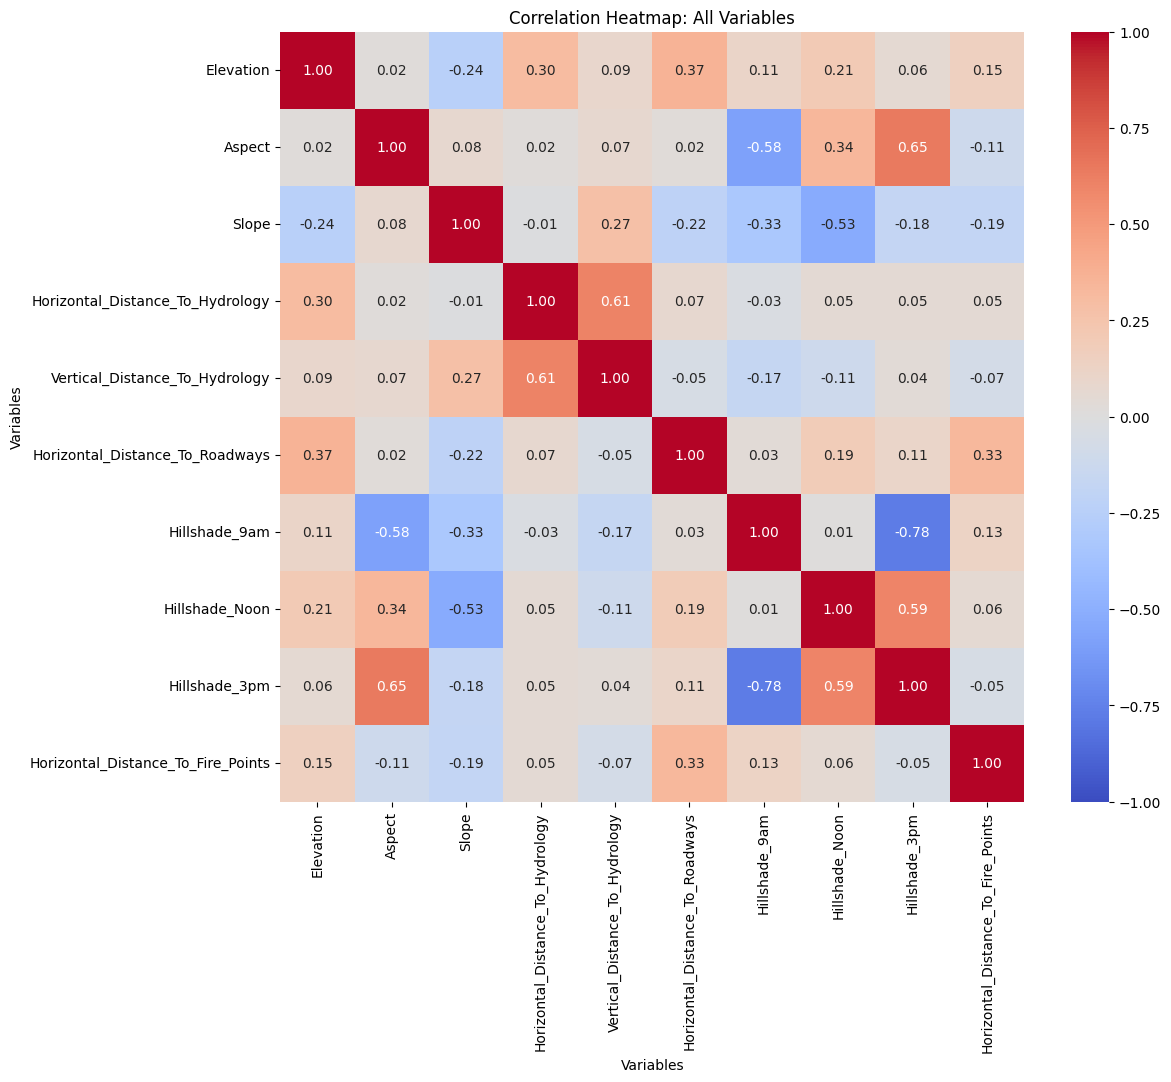

In [17]:
# Since we are predicting Cover Type (Target), we need to figure out what variable to use and we want to make sure to check out possible colinearity

# Calculate the full correlation matrix for the dataset (dropping the binary variables)
correlation = train_data.drop(
    train_data.filter(like='Soil_Type').columns.append(train_data.filter(like='Wilderness_Area').columns.append(train_data.filter(like='Target').columns)), 
    axis=1
)

correlation_matrix = correlation.corr()

# Visualize the entire correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap: All Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

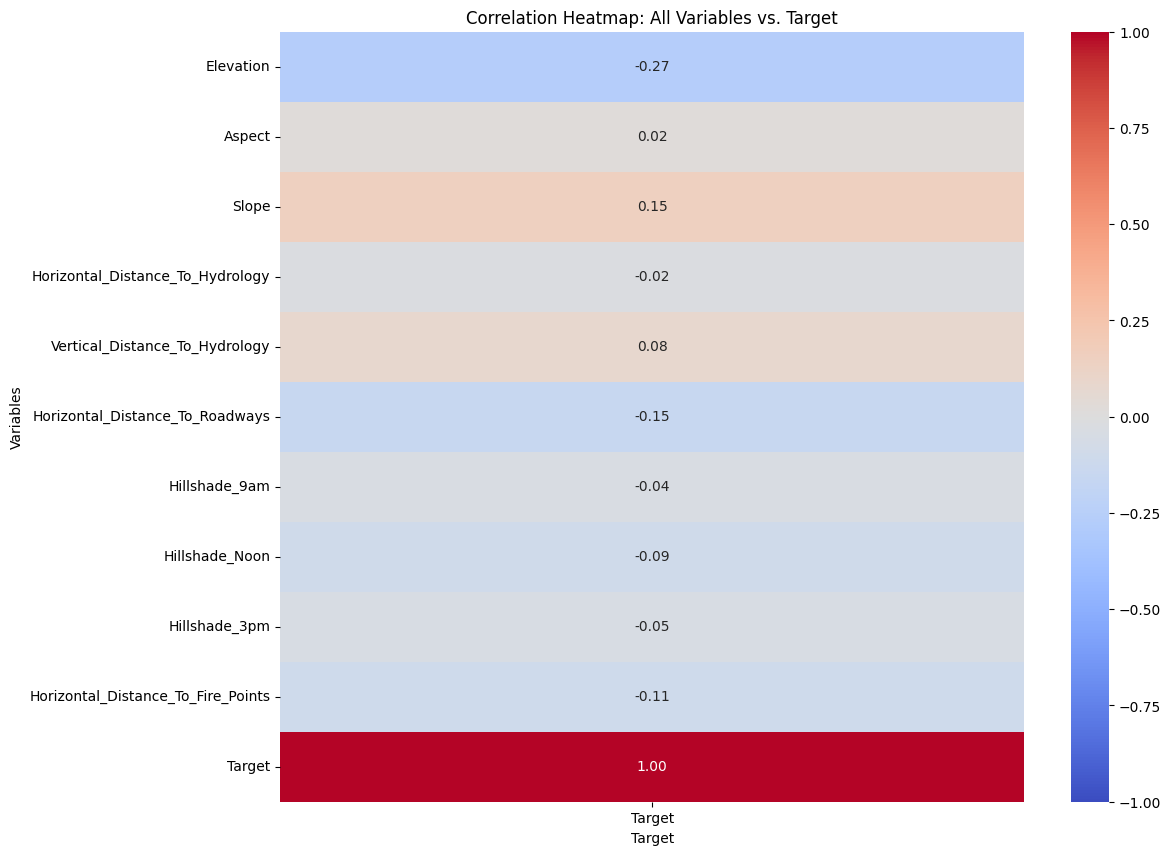

In [18]:
# Since we are predicting Cover Type (Target), we need to figure out what variable to use

# Calculate the full correlation matrix for the dataset (dropping the binary variables)
correlation = train_data.drop(
    train_data.filter(like='Soil_Type').columns.append(train_data.filter(like='Wilderness_Area').columns), 
    axis=1
)
correlation_matrix = correlation.corr()
target_corr = correlation_matrix[['Target']]

# Visualize the entire correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap: All Variables vs. Target')
plt.xlabel('Target')
plt.ylabel('Variables')
plt.show()

Elevation is the most highley corrrelated followed by slope, horizontal distance to roadways and horizontal distance to fire points, which we predicted from looking at the histograms above.

In [19]:
# Check for colinearity amongst the x variables

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

# Sample the data
sample_df = train_data.sample(n=1000, random_state=77)

# Fit the LAD regression model
lad_fit = LADRegression()
lad_fit.fit(X=np.array(sample_df["Horizontal_Distance_To_Hydrology"]).reshape(-1, 1),
            y=sample_df["Horizontal_Distance_To_Fire_Points"])

# Get the intercept and coefficient
intercept = lad_fit.intercept_
coef = lad_fit.coef_[0]

# Calculate predicted values
sample_df['predicted'] = intercept + coef * sample_df["Horizontal_Distance_To_Hydrology"]

# Plot the LAD fitted line on top of the scatterplot
fig = px.scatter(sample_df, x="Horizontal_Distance_To_Hydrology", y="Horizontal_Distance_To_Fire_Points")
fig.add_trace(
    go.Scatter(
        x=sample_df["Horizontal_Distance_To_Hydrology"],
        y=sample_df['predicted'],
        mode='lines',
        name='LAD Fitted Line'
    )
)

fig.show()

In [20]:
# Sample the data
sample_df = train_data.sample(n=1000, random_state=19)

# Fit the LAD regression model
lad_fit = LADRegression()
lad_fit.fit(X=np.array(sample_df["Elevation"]).reshape(-1, 1),
            y=sample_df["Horizontal_Distance_To_Fire_Points"])

# Get the intercept and coefficient
intercept = lad_fit.intercept_
coef = lad_fit.coef_[0]

# Calculate predicted values
sample_df['predicted'] = intercept + coef * sample_df["Elevation"]

# Plot the LAD fitted line on top of the scatterplot
fig = px.scatter(sample_df, x="Elevation", y="Horizontal_Distance_To_Fire_Points")
fig.add_trace(
    go.Scatter(
        x=sample_df["Elevation"],
        y=sample_df['predicted'],
        mode='lines',
        name='LAD Fitted Line'
    )
)

fig.show()

In [21]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

# Sample the data
sample_df = train_data.sample(n=1000, random_state=42)

# Fit the LAD regression model
lad_fit = LADRegression()
lad_fit.fit(X=np.array(sample_df["Slope"]).reshape(-1, 1),
            y=sample_df["Horizontal_Distance_To_Fire_Points"])

# Get the intercept and coefficient
intercept = lad_fit.intercept_
coef = lad_fit.coef_[0]

# Calculate predicted values
sample_df['predicted'] = intercept + coef * sample_df["Slope"]

# Plot the LAD fitted line on top of the scatterplot
fig = px.scatter(sample_df, x="Slope", y="Horizontal_Distance_To_Fire_Points")
fig.add_trace(
    go.Scatter(
        x=sample_df["Slope"],
        y=sample_df['predicted'],
        mode='lines',
        name='LAD Fitted Line'
    )
)

fig.show()

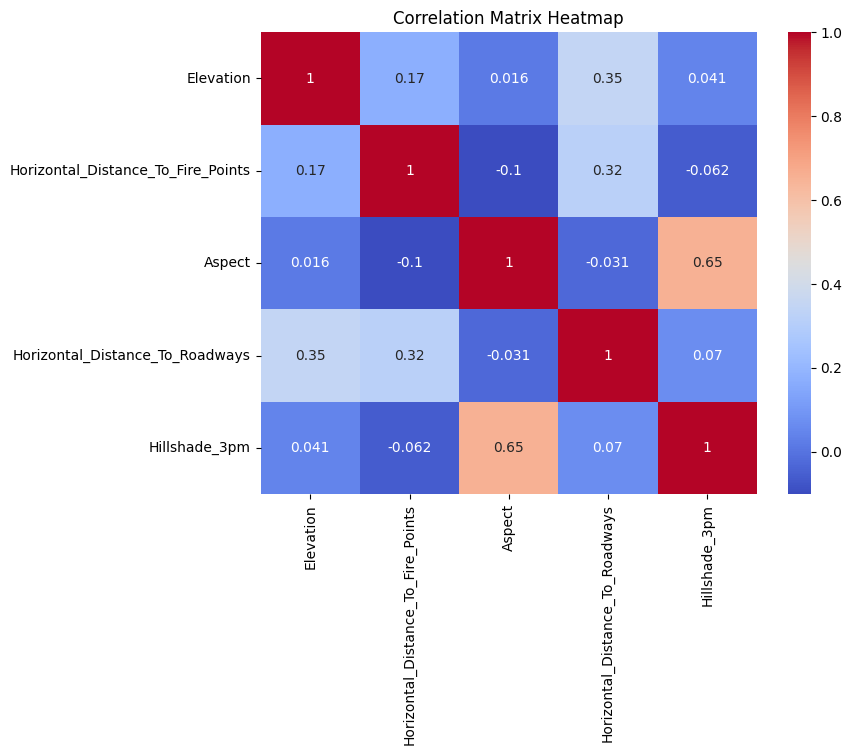

In [22]:
multi = sample_df[["Elevation", "Horizontal_Distance_To_Fire_Points", "Aspect", "Horizontal_Distance_To_Roadways", "Hillshade_3pm"]]

# Calculate correlation matrix
corr_matrix = np.corrcoef(np.transpose(multi))  # Transpose the dataframe for np.corrcoef to work

# Create a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", xticklabels=multi.columns, yticklabels=multi.columns, cbar=True)

# Add labels and title
plt.title("Correlation Matrix Heatmap")
plt.show()

Doesn't seem to be colinear, which is good

In [23]:
X = multi  # Independent variables
y = sample_df['Target']  # Dependent variable (target)

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the linear regression model and fit it to the data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Get the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Coefficients: [-0.32261429 -0.07589237  0.18087524 -0.09621897 -0.16179475]
Intercept: 2.0999999999999996
R-squared: 0.20280055571648858
Mean Absolute Error: 0.6836325468180607
Mean Squared Error: 1.2594954020235196
Root Mean Squared Error: 1.1222724277213263


In [24]:
# Define features and target variable
X = train_data[['Elevation']]  # can include more features here later 
y = train_data['Horizontal_Distance_To_Fire_Points']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Define the alpha values to test
alphas = np.logspace(-1, 6, 100)

# Create a list to store the cross-validation scores
ridge_cv_scores = []

# Loop to compute the cross-validation score for each alpha value
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge_cv = cross_validate(estimator=ridge,
                              X=X_std,
                              y=y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')
    # Append the results
    ridge_cv_scores.append({
        'alpha': alpha,
        'log_alpha': np.log(alpha),
        'test_mse': -np.mean(ridge_cv['test_score'])
    })

# Convert the cross-validation scores into a DataFrame
ridge_cv_scores_df = pd.DataFrame(ridge_cv_scores)
print(ridge_cv_scores_df)

# Plot the cross-validation scores as a function of alpha
fig = px.line(ridge_cv_scores_df,
              x='log_alpha',
              y='test_mse',
              title='Ridge Regression Cross-Validation Scores',
              labels={'log_alpha': 'Log(Alpha)', 'test_mse': 'Test RMSE'})

fig.show()


             alpha  log_alpha     test_mse
0         0.100000  -2.302585  1311.335987
1         0.117681  -2.139776  1311.335987
2         0.138489  -1.976967  1311.335987
3         0.162975  -1.814158  1311.335987
4         0.191791  -1.651349  1311.335987
5         0.225702  -1.488540  1311.335987
6         0.265609  -1.325731  1311.335987
7         0.312572  -1.162922  1311.335987
8         0.367838  -1.000113  1311.335987
9         0.432876  -0.837304  1311.335987
10        0.509414  -0.674495  1311.335987
11        0.599484  -0.511686  1311.335987
12        0.705480  -0.348877  1311.335987
13        0.830218  -0.186067  1311.335987
14        0.977010  -0.023258  1311.335987
15        1.149757   0.139551  1311.335987
16        1.353048   0.302360  1311.335987
17        1.592283   0.465169  1311.335987
18        1.873817   0.627978  1311.335987
19        2.205131   0.790787  1311.335987
20        2.595024   0.953596  1311.335987
21        3.053856   1.116405  1311.335987
22        3

In [25]:
# First, split the data into training and temp (which will later be split into validation and testing)
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42) # the random state will ensure we will all start at the same point

# Now split the temp data into validation and testing sets
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Check the sizes of each set
print(f'Training set size: {train_data.shape[0]}')
print(f'Validation set size: {val_data.shape[0]}')
print(f'Test set size: {test_data.shape[0]}')

train_data.sample(10)

train_data.sample(1)

Training set size: 348607
Validation set size: 116202
Test set size: 116203


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
225577       2998      36     13                               408   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
225577                             155                             1976   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
225577            219             211            126   

        Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Soil_Type1  \
225577                                3020                 0           0   

        Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  \
225577           0           0           0           0           0   

        Soil_Type7  Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  \
225577           0           0           0            0            0   

        Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  \
225577            0            0            0            0            0   

        Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  \
225577            0            0            0            0            0   

        Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  \
225577            0            0            0            0            0   

        Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  \
225577            0            0            0            0            0   

        Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  \
225577            1            0            0            0            0   

        Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  Wilderness_Area2  \
225577            0            0            0            0                 0   

        Wilderness_Area3  Wilderness_Area4  Target  
225577                 1                 0       2

In [26]:
# Select only the necessary features for logistic regression
features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4']
lr_df = train_data[['Target'] + features]

X_train = lr_df[features]
X_val = val_data[features]
y_train = train_data['Target']
y_val = val_data['Target']

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X = X_train, y = y_train)

lr_intercept = lr.intercept_
lr_coefficients = lr.coef_

print(lr_intercept, lr_coefficients)

[-0.00795211  0.02596971  0.08716707  0.0765453  -0.04802017 -0.05694567
 -0.09430582] [[ 6.15145609e-03 -4.22126692e-04 -8.78341686e-02 -1.56991350e-03
  -2.63644422e-03 -6.41118411e-05 -7.59312883e-02  2.94657671e-02
  -5.26812305e-02 -2.81488884e-05  1.05965489e-01 -3.67819490e-02
  -5.98767609e-02 -1.72588886e-02]
 [-4.32916604e-03 -1.77642263e-04  4.13574153e-02  1.63550052e-03
   5.11931735e-04  5.92875303e-05  4.68150919e-02 -2.15004123e-02
   3.73209575e-02  9.32536449e-05  1.38137980e+00  1.31498846e+00
   1.03969375e+00 -3.71009229e+00]
 [-8.77188046e-03  1.22995649e-03  1.13391363e-01  2.35624932e-03
   2.74728072e-03 -1.44072751e-04  7.49144560e-02 -2.05650005e-02
   4.79388405e-02 -2.20304204e-04 -1.60793302e+00 -2.21813451e-02
   1.20949191e+00  5.07789520e-01]
 [-6.89278297e-03  4.18966550e-04 -6.18685673e-02 -8.17846602e-03
   1.21247109e-02  1.31313155e-03 -3.78089258e-04  5.47756701e-02
  -3.30060637e-02  8.68584194e-04 -3.55386877e+00 -1.31065561e-02
  -1.92198317e+0

In [27]:
pred_val = pd.DataFrame(dict(
    target = y_val,
    lr_predict = lr.predict(X_val)))
print(lr.score(X_val, y_val))
pred_val.sample(10)

0.6763050549904477


target  lr_predict
164028       2           2
34665        2           2
399892       7           1
77686        2           2
89922        2           2
524638       1           2
225340       3           3
406756       1           1
363975       1           1
43724        2           2

Text(95.72222222222221, 0.5, 'True')

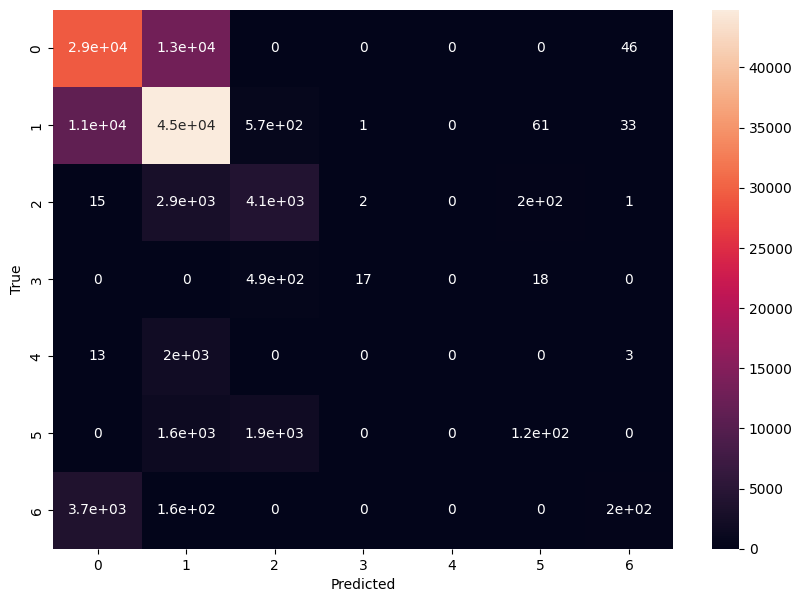

In [28]:
# Confusion matrix
conf_lr = metrics.confusion_matrix(y_true = pred_val['target'],
                                   y_pred = pred_val['lr_predict'])

import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(conf_lr, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import plotly.graph_objs as go

false_pos_rate = dict()
true_pos_rate = dict()
auc = dict()
roc_data = []

cover_type_map = {
    1: 'Spruce/Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow', 5: 'Aspen', 6: 'Douglas-fir', 7: 'Krummholz'}

# binarize target variable
classes = np.unique(pred_val['target'])
y_true = label_binarize(pred_val['target'], classes=classes)

# get prediction probabilities
y_pred_proba = lr.predict_proba(X_val)

# compute ROC and AUC for each class
for i in range(len(classes)):
    false_pos_rate[i], true_pos_rate[i], _ = roc_curve(y_true[:,i], y_pred_proba[:,i])
    auc[i] = metrics.auc(false_pos_rate[i], true_pos_rate[i])

for i in range(len(classes)):
    class_roc = pd.DataFrame({
        'False Positive Rate': false_pos_rate[i],
        'True Positive Rate': true_pos_rate[i],
        'Class': cover_type_map[classes[i]],
        'Threshold': np.linspace(0, 1, len(false_pos_rate[i]))})
    roc_data.append(class_roc)

# plot ROCs
roc_df = pd.concat(roc_data)
fig = px.line(roc_df, x='False Positive Rate', y='True Positive Rate',
              color='Class', width=700, height=500,
              title='ROC Curves for Each Forest Cover Type')
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1],
                          mode='lines',
                          name='Random Classifier',
                          line=dict(dash='dot')))
fig.show()

# print AUC for each cover type, as well as average AUC
print("\nAUC for each forest cover type:")
for i, auc_score in enumerate(auc.values()):
    print(f"{cover_type_map[classes[i]]}: {auc_score:.4f}")
average_auc = np.mean(list(auc.values()))
print(f"\nAverage AUC: {average_auc:.4f}")


AUC for each forest cover type:
Spruce/Fir: 0.8340
Lodgepole Pine: 0.8138
Ponderosa Pine: 0.9763
Cottonwood/Willow: 0.9935
Aspen: 0.8556
Douglas-fir: 0.9615
Krummholz: 0.9581

Average AUC: 0.9133


Implementing KNN model using best predictor variables chosen from PCA (['Horizontal_Distance_To_Fire_Points'], ['Horizontal_Distance_To_Roadways']) with various k values to select one for best accuracy.

In [30]:

# Correct way to select multiple columns
X = train_data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4']]
y = train_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn1 = KNeighborsClassifier(1)
knn1.fit(X_train_scaled, y_train)

knn5 = KNeighborsClassifier(5)
knn5.fit(X_train_scaled, y_train)

knn15 = KNeighborsClassifier(15)
knn15.fit(X_train_scaled, y_train)

knn25 = KNeighborsClassifier(25)
knn25.fit(X_train_scaled, y_train)

pred1 = knn1.predict(X_train_scaled)
pred5 = knn5.predict(X_train_scaled)
pred15 = knn15.predict(X_train_scaled)
pred25 = knn25.predict(X_train_scaled)

plt.boxplot([knn1.predict_proba(X_train_scaled)[:,1],knn5.predict_proba(X_train_scaled)[:,1],
             knn15.predict_proba(X_train_scaled)[:,1],knn25.predict_proba(X_train_scaled)[:,1]])
plt.legend(["1=knn1","2=knn5","3=knn15","4=knn25"]);

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
print("Classification accuracy for knn1 were: \n Train =", 
      knn1.score(X_train_scaled, y_train), ", Test =", 
      knn1.score(X_test_scaled, y_test))

print("Classification accuracy for knn5 were: \n Train =", 
      knn5.score(X_train_scaled, y_train), ", Test =", 
      knn5.score(X_test_scaled, y_test))

print("Classification accuracy for knn15 were: \n Train =", 
      knn15.score(X_train_scaled, y_train), ", Test =", 
      knn15.score(X_test_scaled, y_test))

print("Classification accuracy for knn25 were: \n Train =", 
      knn25.score(X_train_scaled, y_train), ", Test =", 
      knn25.score(X_test_scaled, y_test))

In [ ]:


y_pred = knn5.predict(X_test_scaled)

# accuracy for each class
accuracies = []
for class_num in range(1, 8):  # for classes 1-7
    # Get indices where true value is the current class
    class_indices = y_test == class_num
    # Calculate accuracy for this class
    class_accuracy = np.mean(y_pred[class_indices] == y_test[class_indices])
    accuracies.append(class_accuracy)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 8), accuracies)
plt.title('Prediction Accuracy per Class (k=5)')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis from 0 to 1
plt.xticks(range(1, 8))
for i, acc in enumerate(accuracies):
    plt.text(i+1, acc, f'{acc:.2f}', ha='center', va='bottom')
plt.show()

# Print numeric values
for i, acc in enumerate(accuracies, 1):
    print(f"Class {i} accuracy: {acc:.3f}")


In [ ]:

# make predictions on test data
# choose k = 5, bc best balance of accuracy and not too different in overfitting data like k=1
test_pred = y_pred
test_pred_proba = knn5.predict_proba(X_test_scaled)

# Confusion Matrix on test data
conf_matrix = confusion_matrix(y_test, test_pred)
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)

In [ ]:
# metrics for entire model and per class confusion matrix
accuracy = accuracy_score(y_test, test_pred)
error_rate = 1 - accuracy

f1 = f1_score(y_test, test_pred, average='weighted')

print(f"\nTest Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Error Rate: {error_rate:.3f}")
print("\nPer-class True Negative Rates:")
print(f"\nF1 Score (weighted): {f1:.3f}")

NameError: name 'accuracy_score' is not defined

In [ ]:

# assembling confusion matrix per class with TP, TN, FP, FN rates

conf_matrix = confusion_matrix(y_test, y_pred)


labels = range(1, 8)  # for classes 1-7

plt.figure(figsize=(10, 8))

# raw counts of prediction
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Counts)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# plot percentages by normalizing
plt.subplot(1, 2, 2)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Normalized)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Checkin 5: PCA

In [ ]:
# Convert to numpy array
count_mat = X.to_numpy()

# Mean-center the columns
X = count_mat - np.mean(count_mat, axis=0)

# Calculate covariance matrix (X^T X)
cov_mat = np.matmul(np.transpose(X), X)

# Calculate eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(cov_mat)

# Print first 3 eigenvalues
print("First eigenvals:", eigenvals[0:3])
print("\nFirst eigenvecs:", eigenvecs[:, 0:3])

In [ ]:
# plotting a scree plot
ids = eigenvals.argsort()[::-1]
sorted_eigenvals = eigenvals[ids]
sorted_eigenvecs = eigenvecs[:,ids]
plt.plot(range(1,51),sorted_eigenvals[0:50])

Having a larger first eigenvector compared to other eigenvectors, and the steep drop off in the scree plot after the first few components indicates to us that we can indeed just use a few components to determine covertype than all of the original features.

In [ ]:
# Print cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative variance explained by components:")
for i, var in enumerate(cumulative_variance):
    if var > 0.9:  # Stop after we reach 90% explained variance
        print(f"First {i+1} components explain {var:.2%} of variance")
        break
    print(f"First {i+1} components explain {var:.2%} of variance")

This means we just need 2 components to capture about 97% of the data. Now we will run pca with the goal of just using the top 2 components.

In [ ]:

# Get feature names from the variables DataFrame
feature_names = covertype.variables['name'].tolist()

# Create and fit PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)

# Print explained variance
print("\nCumulative variance explained by components:")
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(cumulative_variance):
    print(f"First {i+1} components explain {var:.2%} of variance")

# Print top contributing features for each component
for i, component in enumerate(pca.components_):
    # Get indices of top 5 features by absolute value
    top_features = np.argsort(np.abs(component))[-5:][::-1]
    
    print(f"\nTop 5 features in component {i+1}:")
    for idx in top_features:
        print(f"{feature_names[idx]}: {component[idx]:.4f}")

Checkin 6: Neural Networks

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
## Prep Work ## 
# data (as pandas dataframes)
X = covertype.data.features
X = X.drop(columns=X.filter(regex='^(Soil_Type|Wilderness_Area)').columns)
y = covertype.data.targets

print(X.shape)
print(y.shape)

# First, split the data into training and temp (which will later be split into validation and testing)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=10000, random_state=58, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=5000, random_state=58, stratify=y_temp)

# Check the sizes of each set
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_valid.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

# Check the sizes of each set
print(f'Training set size: {y_train.shape[0]}')
print(f'Validation set size: {y_valid.shape[0]}')
print(f'Test set size: {y_test.shape[0]}')

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Label Encoding to ensure target labels are integers
label_encoder = LabelEncoder()

# Convert y_train and y_valid into integer class labels (if they are not already integers)
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)

(581012, 10)
(581012, 1)
Training set size: 566012
Validation set size: 5000
Test set size: 10000
Training set size: 566012
Validation set size: 5000
Test set size: 10000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# Define sigmoid function 
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

# Assigns hot encoding to the Target variable (e.g. if Target = 2 then [0, 1, 0, 0, 0, 0])
def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary

# Define softmax function for multi-class classification
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

## Implement the NN ## 
# Neural Network Class
class NeuralNetMLP:

    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()

        self.num_classes = num_classes

        # Initialize weights and biases using random normal distribution
        rng = np.random.RandomState(random_seed)

        self.weight_h = rng.normal(loc=0.0, scale=0.1, size=(num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)

        self.weight_out = rng.normal(loc=0.0, scale=0.1, size=(num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)

    def forward(self, x):
        # Hidden layer
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)

        # Output layer (Softmax for multi-class classification)
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = softmax(z_out)
        return a_h, a_out

    def backward(self, x, a_h, a_out, y):
        y_onehot = int_to_onehot(y, self.num_classes)

        # Output layer gradient
        d_loss__d_a_out = a_out - y_onehot
        d_a_out__d_z_out = a_out * (1. - a_out)
        delta_out = d_loss__d_a_out * d_a_out__d_z_out

        d_z_out__dw_out = a_h
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss__db_out = np.sum(delta_out, axis=0)

        # Hidden layer gradient
        d_z_out__a_h = self.weight_out
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)
        d_a_h__d_z_h = a_h * (1. - a_h)
        d_z_h__d_w_h = x
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)
        d_loss__d_b_h = np.sum(d_loss__a_h * d_a_h__d_z_h, axis=0)

        return d_loss__dw_out, d_loss__db_out, d_loss__d_w_h, d_loss__d_b_h

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(m), np.argmax(y_true, axis=1)])
        loss = np.sum(log_likelihood) / m
        return loss

    def compute_accuracy(self, y_true, y_pred):
        y_true_class = np.argmax(y_true, axis=1)
        return np.mean(y_true_class == y_pred)

    def predict(self, X):
        _, a_out = self.forward(X)
        return np.argmax(a_out, axis=1)

In [ ]:
## Initialize the model ##
model = NeuralNetMLP(X_train_scaled.shape[1],
                     num_hidden=96,
                     num_classes=7)

In [ ]:
# Data Loaders
num_epochs = 50
minibatch_size = 32

## Generates "mini-batches" of the training data to train the model on random subets of the train data
def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    for start_idx in range(0, indices.shape[0] - minibatch_size + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        yield X[batch_idx], y[batch_idx]

# Training loop
def train(model, X_train, y_train, X_valid, y_valid, epochs=50, batch_size=100, learning_rate=0.01):
    losses = []
    val_losses = []
    accuracies = []  # Store training accuracy per epoch
    val_accuracies = []  # Store validation accuracy per epoch

    # One-hot encode labels
    y_train_onehot = int_to_onehot(y_train, model.num_classes)
    y_valid_onehot = int_to_onehot(y_valid, model.num_classes)

    for epoch in range(epochs):
        minibatch_gen = minibatch_generator(X_train, y_train, batch_size)

        for X_batch, y_batch in minibatch_gen:
            # Forward pass
            a_h, a_out = model.forward(X_batch)

            # Backward pass
            d_dw_out, d_db_out, d_d_w_h, d_d_b_h = model.backward(X_batch, a_h, a_out, y_batch)

            # Update weights and biases using grad descent
            model.weight_out -= learning_rate * d_dw_out
            model.bias_out -= learning_rate * d_db_out
            model.weight_h -= learning_rate * d_d_w_h
            model.bias_h -= learning_rate * d_d_b_h

        # Compute loss and accuracy after each epoch
        train_loss = model.compute_loss(y_train_onehot, model.forward(X_train)[1])
        train_acc = model.compute_accuracy(y_train_onehot, model.predict(X_train))
        
        val_loss = model.compute_loss(y_valid_onehot, model.forward(X_valid)[1])
        val_acc = model.compute_accuracy(y_valid_onehot, model.predict(X_valid))

        losses.append(train_loss)
        val_losses.append(val_loss)
        accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc*100:.2f}%")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%")

    return losses, val_losses, accuracies, val_accuracies


# Train the model
losses, val_losses, accuracies, val_accuracies = train(model, X_train_scaled, y_train, X_valid_scaled, y_valid, epochs=50, batch_size=100, learning_rate=0.01)

Epoch 1/50, Train Loss: 0.8740, Train Accuracy: 69.27%
Validation Loss: 0.8840, Validation Accuracy: 68.96%
Epoch 2/50, Train Loss: 0.8209, Train Accuracy: 70.50%
Validation Loss: 0.8549, Validation Accuracy: 70.14%
Epoch 3/50, Train Loss: 0.7721, Train Accuracy: 68.50%
Validation Loss: 0.7977, Validation Accuracy: 67.76%
Epoch 4/50, Train Loss: 0.6966, Train Accuracy: 72.57%
Validation Loss: 0.7177, Validation Accuracy: 72.24%
Epoch 5/50, Train Loss: 0.6924, Train Accuracy: 72.53%
Validation Loss: 0.7173, Validation Accuracy: 72.24%
Epoch 6/50, Train Loss: 0.6676, Train Accuracy: 73.80%
Validation Loss: 0.6887, Validation Accuracy: 72.84%
Epoch 7/50, Train Loss: 0.6598, Train Accuracy: 74.07%
Validation Loss: 0.6768, Validation Accuracy: 73.22%
Epoch 8/50, Train Loss: 0.6458, Train Accuracy: 74.62%
Validation Loss: 0.6608, Validation Accuracy: 73.90%
Epoch 9/50, Train Loss: 0.6398, Train Accuracy: 74.87%
Validation Loss: 0.6545, Validation Accuracy: 74.40%
Epoch 10/50, Train Loss: 0.6

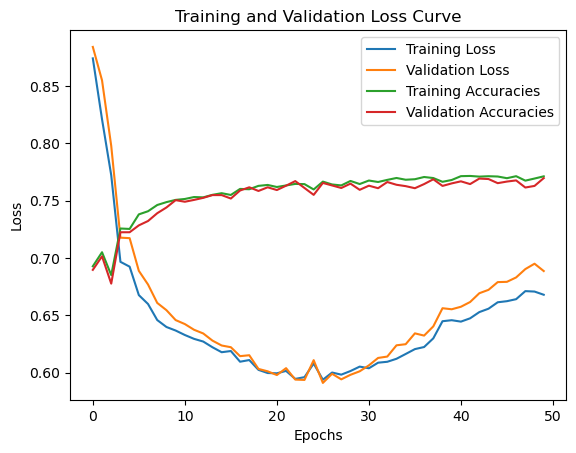

In [ ]:
# Plot the loss curve
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')  # Plot validation loss
plt.plot(accuracies, label='Training Accuracies')
plt.plot(val_accuracies, label='Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.show()